# Import Libraries

pandas: A library for data manipulation and analysis, providing structures like DataFrames for tabular data.

numpy: A library for numerical computing, providing efficient array operations and mathematical functions.

seaborn: A statistical data visualization library built on top of matplotlib, useful for creating attractive and informative charts.

matplotlib: A plotting library for creating static, animated, and interactive visualizations in Python.

sklearn: A machine learning library providing simple and efficient tools for data mining, analysis, and model training.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# Loading the Dataset
pd.read_csv() is used to load the CSV file into a pandas DataFrame, allowing for data manipulation and analysis.

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking Dataset Shape
df.shape returns the dimensions (rows, columns) of the DataFrame, indicating the size of the dataset.

In [3]:
df.shape

(768, 9)

# Dataset Information
df.info() provides a summary of the DataFrame, including column data types, non-null counts, and memory usage.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Descriptive Statistics

df.describe() generates summary statistics for numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, and quartile values.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking for Null Values

df.isnull().sum() returns the total number of missing (null) values in each column of the DataFrame.

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

# Boxplot Visualization of Numerical Columns

The code creates boxplots for each numerical column in the DataFrame to visualize the distribution of values and identify potential outliers.

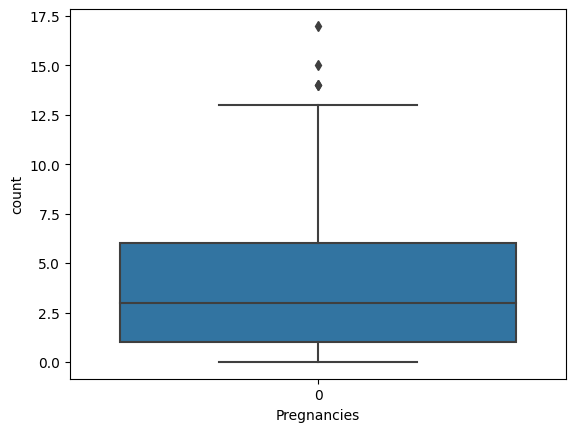

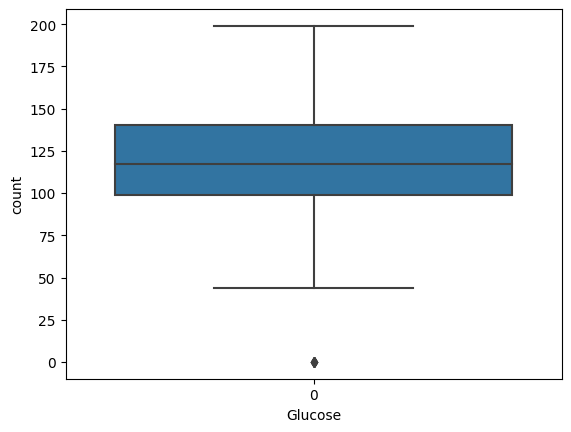

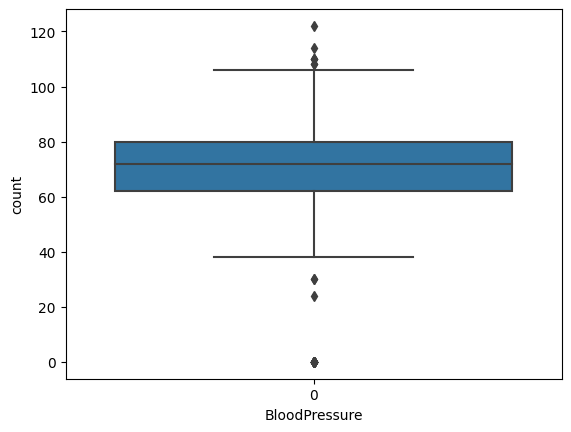

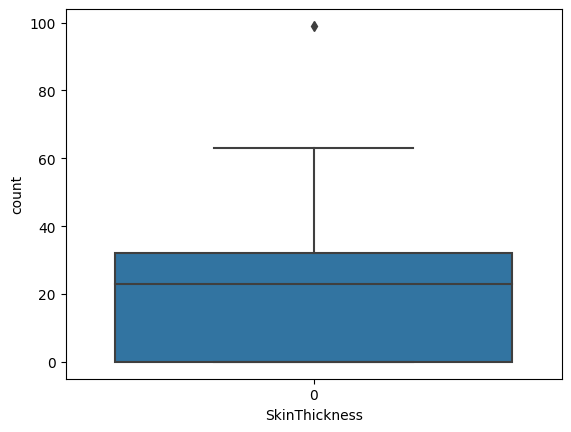

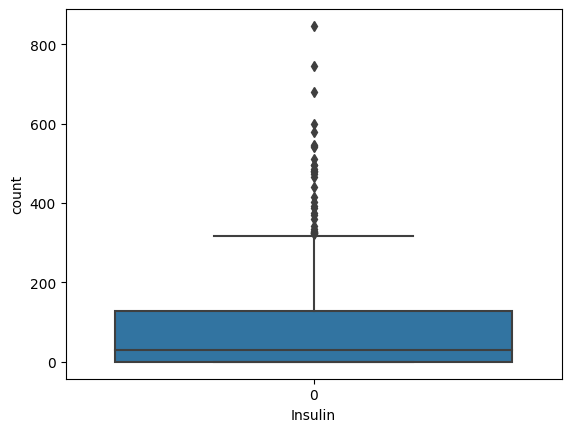

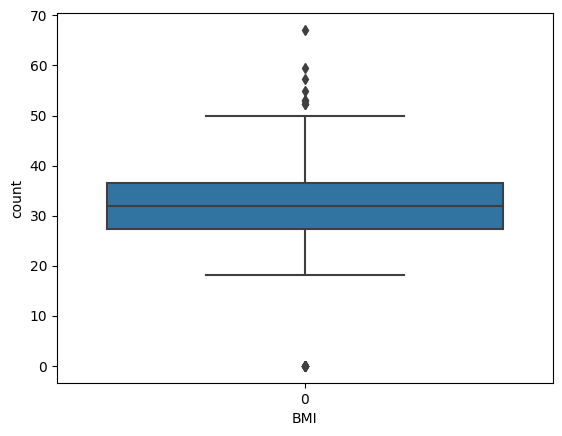

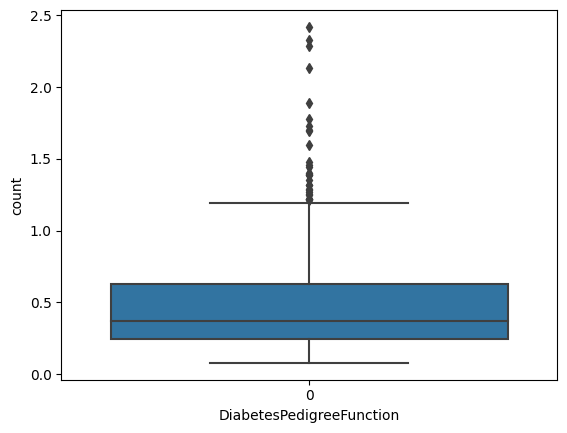

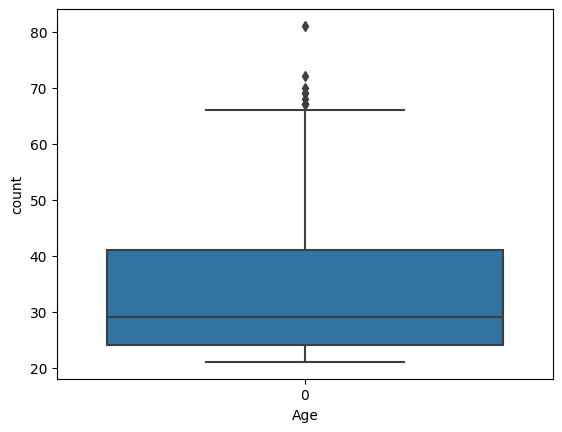

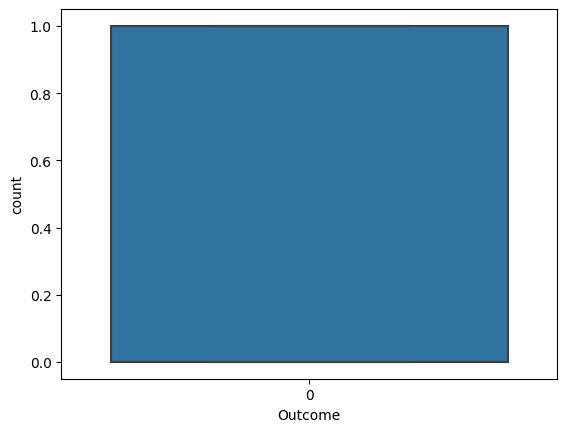

In [8]:
for i in df.columns:
  if ((df[i].dtypes == "int64") or (df[i].dtypes == "float64")):
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

# Removing Outliers using IQR

The code removes outliers from the DataFrame using the Interquartile Range (IQR) method, which filters data points outside the range defined by Q1 - 1.5IQR and Q3 + 1.5IQR.

In [9]:
out_list = ['Glucose','BMI','Insulin','BloodPressure','Age','DiabetesPedigreeFunction','Pregnancies']

for i in out_list:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3 - Q1

  df = df[(df[i]>= Q1-1.5*IQR) & (df[i]<= Q3+1.5*IQR)]

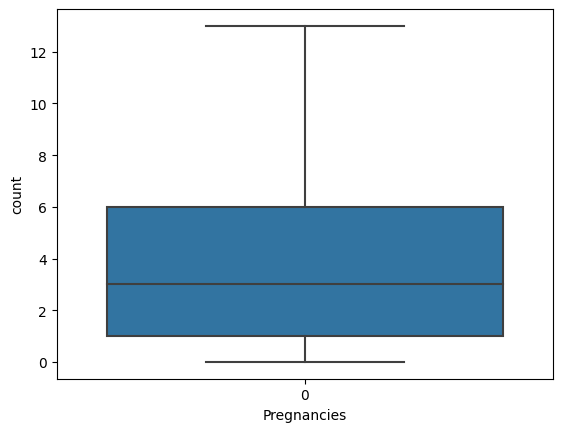

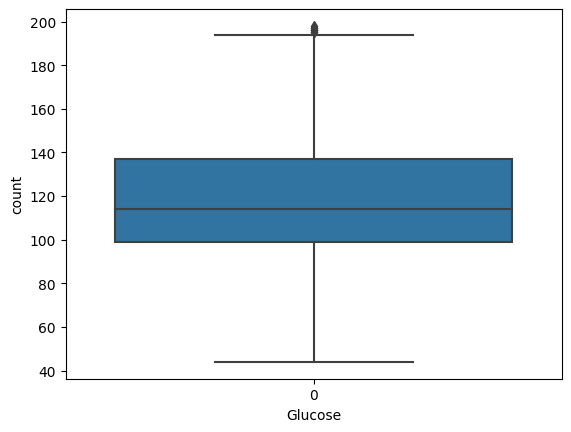

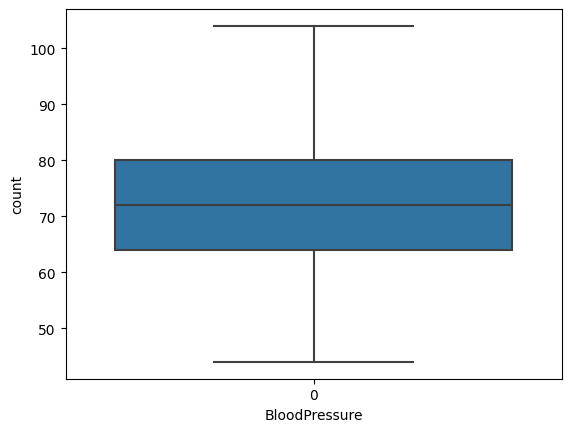

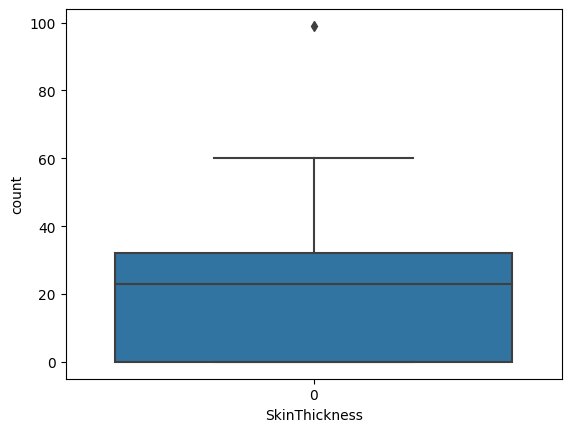

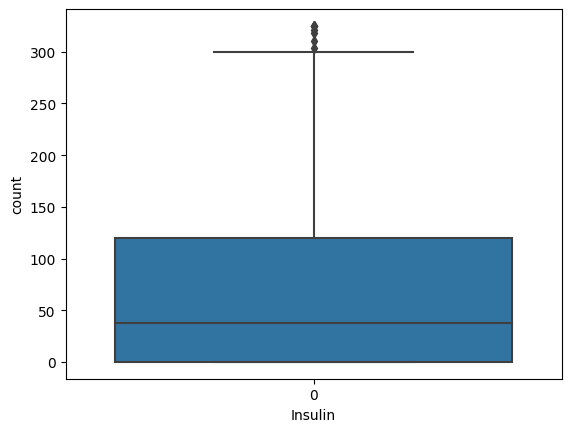

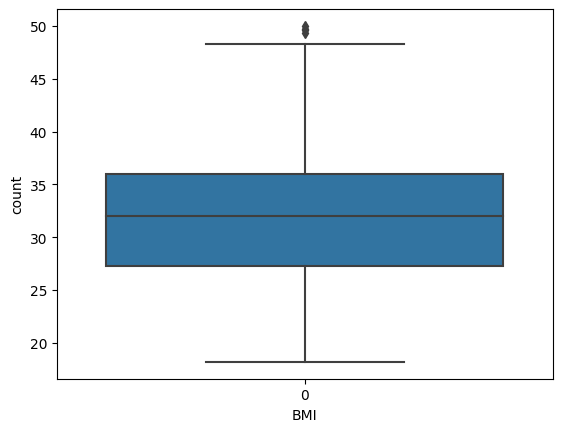

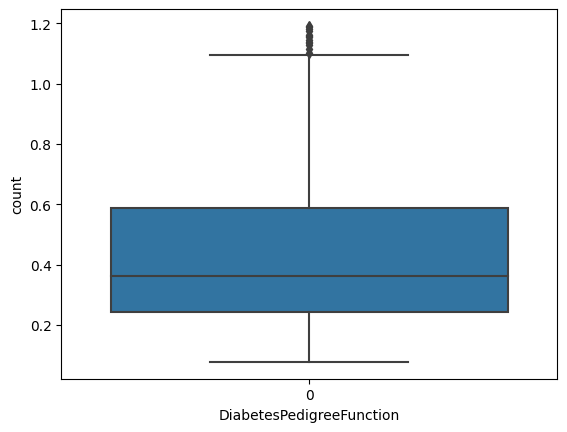

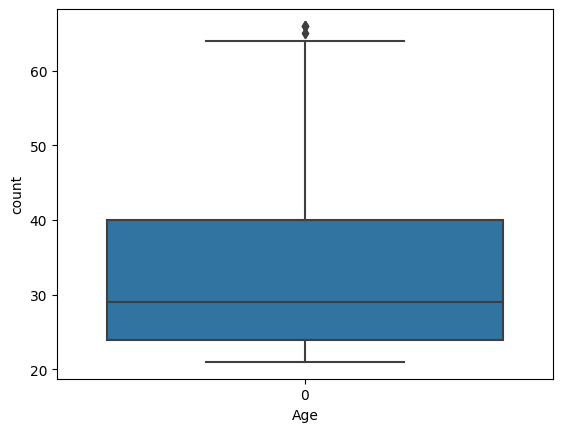

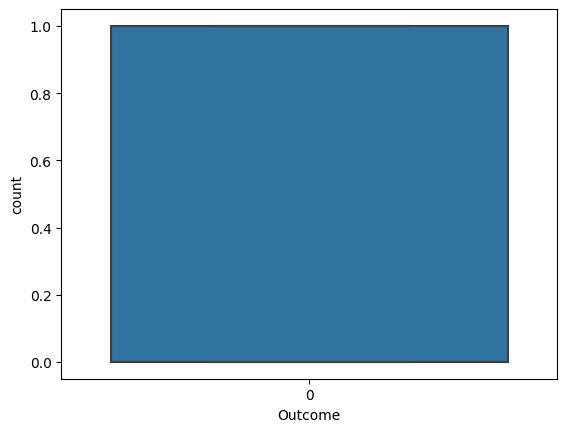

In [10]:
for i in df.columns:
  if ((df[i].dtypes == "int64") or (df[i].dtypes == "float64")):
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

# Checking for Duplicate Entries


df.duplicated().sum() counts the total number of duplicate rows in the DataFrame, helping to identify and assess data quality issues.

In [11]:
df.duplicated().sum()

0

# Feature Selection

Feature selection involves identifying relevant features for model training, typically achieved by excluding the target variable from the dataset.

In [12]:
X = df.drop('Outcome', axis = 'columns')

#  Target Variable

The target variable is the outcome that the model is trying to predict, represented by the Outcome column.

In [13]:
y = df.Outcome

# Logistic Regression Model

A Logistic Regression model is a statistical method used for binary classification that predicts the probability of an outcome based on one or more predictor variables.

In [14]:
model = LogisticRegression()

# Recursive Feature Elimination (RFE)


RFE (Recursive Feature Elimination) is a feature selection technique that recursively removes the least important features based on model performance to improve predictive accuracy.

In [15]:
rfe = RFE(model)

In [16]:
rfe.fit(X,y)

c:\users\nishanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


RFE(estimator=LogisticRegression())

# Selected Features from RFE

The selected features from RFE are the most relevant ones chosen by the model to use for making predictions.

In [17]:
rfe.support_

array([ True,  True, False, False, False,  True,  True, False])

In [18]:
X.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [19]:
X = X[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']]
X.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
0,6,148,33.6,0.627
1,1,85,26.6,0.351
2,8,183,23.3,0.672
3,1,89,28.1,0.167
5,5,116,25.6,0.201


In [20]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 640, dtype: int64

# Splitting Data for Training and Testing

train_test_split() is a function that divides the dataset into two subsets: one for training the model and another for testing its performance.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.30, random_state= 999)

#  Training the Model

Training the model involves fitting the machine learning algorithm to the training dataset to learn the patterns and relationships between the features and the target variable.

In [22]:
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
X_test.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
188,8,109,27.9,0.640
379,0,93,43.4,1.021
412,1,143,42.4,1.076
450,1,82,21.2,0.415
532,1,86,41.3,0.917


In [24]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# Evaluating Model Accuracy


Evaluating model accuracy involves measuring how well the trained model predicts outcomes on the test dataset, typically expressed as a percentage of correctly predicted instances.

In [25]:
model.score(X_test, y_test)

0.78125

# Making a Prediction

Making a prediction involves using the trained model to forecast the outcome for new or unseen data based on the learned patterns.

In [26]:
# Prediction

model.predict([[8,110,30,1.021]])

c:\users\nishanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int64)